In [1]:
import numpy as np
import pandas as pd
np.random.seed(42)

#Data
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Classifiers
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Measures
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, balanced_accuracy_score

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}
classifier_names = list(classifiers.keys())
measure_steps = [0,1,2,3,4,5,6,7,8]
n_steps = len(measure_steps)
metrics = {
    'Accuracy': np.zeros((len(classifiers), n_steps)),
    'Precision': np.zeros((len(classifiers), n_steps)),
    'Recall': np.zeros((len(classifiers), n_steps)),
    'F1 Score': np.zeros((len(classifiers), n_steps))
}

In [3]:
measure_values = []
for i, step in enumerate(measure_steps):


    X, y = make_classification(n_samples=10000,
                           n_features=8,
                           class_sep=1,
                           n_classes=2,
                           random_state=42)
    for j in range(step):
        X[:,j] = pd.qcut(X[:,j], q=5, labels=[0,1,2,3,4])



    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


    measure_values.append(i)
    for j, (classifier_name, classifier) in enumerate(classifiers.items()):

            # Standardize the features (optional but often recommended)
            scaler = StandardScaler()
            train_X_scaled = scaler.fit_transform(X_train)
            test_X_scaled = scaler.transform(X_test)
            # Train the classifier
            classifier.fit(train_X_scaled, y_train)
            # Make predictions on the fixed test set
            predictions = classifier.predict(test_X_scaled)
            # Calculate metrics and store in the metrics dictionary
            metrics['Accuracy'][j, i] = balanced_accuracy_score(y_test, predictions)
            metrics['Precision'][j, i] = precision_score(y_test, predictions, average='weighted')
            metrics['Recall'][j, i] = recall_score(y_test, predictions, average='weighted')
            metrics['F1 Score'][j, i] = f1_score(y_test, predictions, average='weighted')




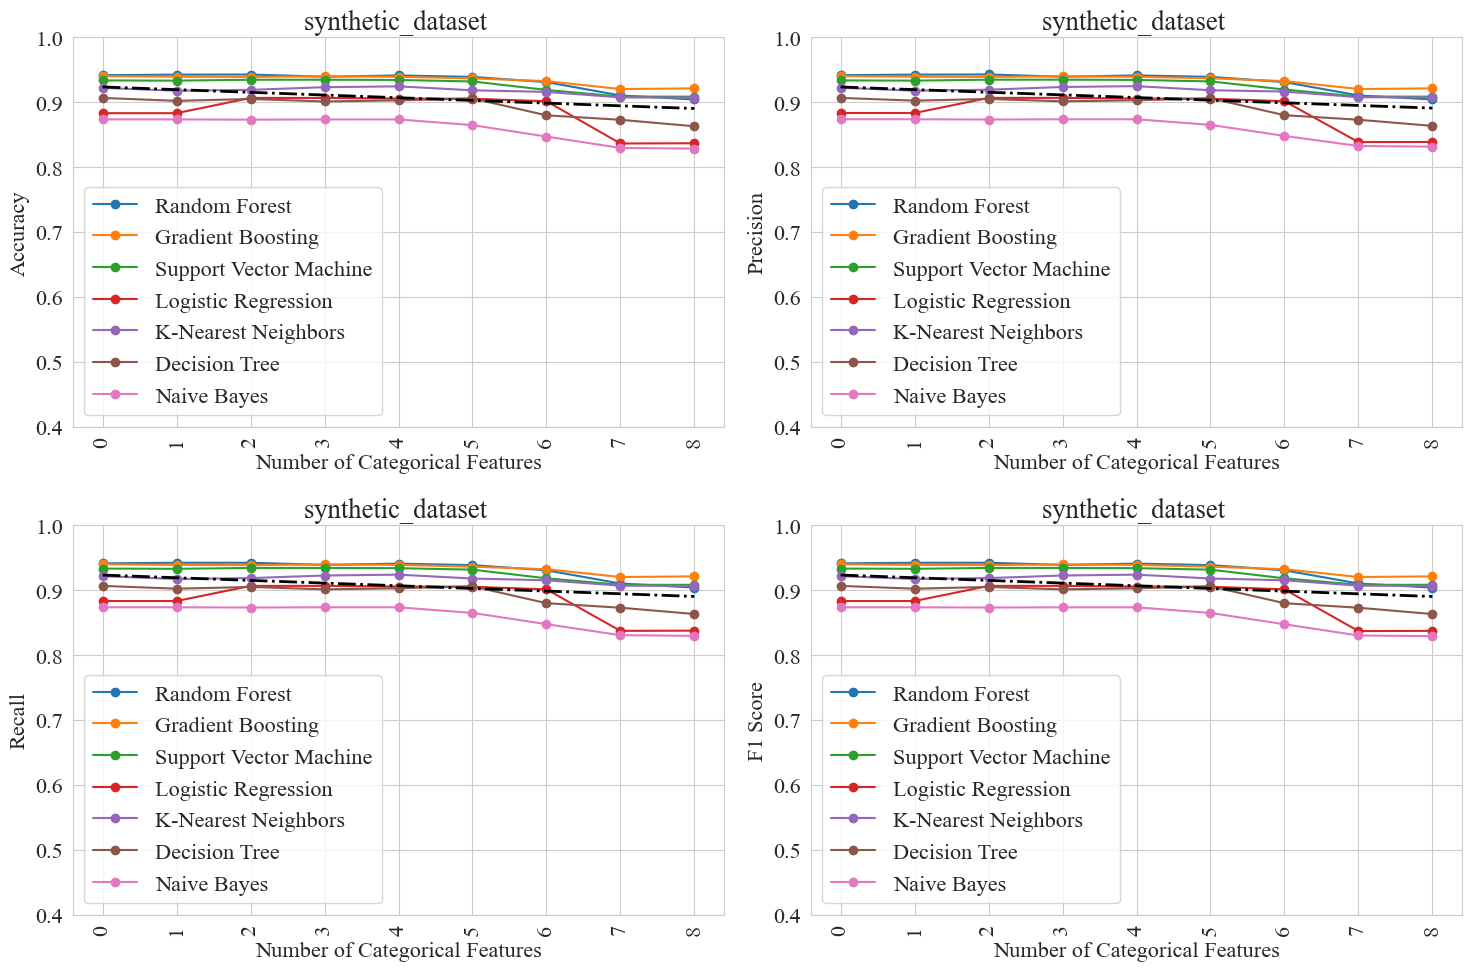

In [4]:
dataset_name = 'synthetic_dataset'

# Plotting
plt.figure(figsize=(15, 10))

for k, metric in metrics.items():
    plt.subplot(2, 2, list(metrics.keys()).index(k) + 1)
    for i in range(len(classifiers)):

        z = sorted(zip(measure_values, metric[i, :]))
        x=[j[0] for j in z]
        y=[j[1] for j in z]

        plt.plot(x, y, label=classifier_names[i], marker='o')
        plt.title(f'{dataset_name} ')
        plt.xticks(x)
        plt.xticks(rotation=90)

        plt.xlabel('Number of Categorical Features')
        plt.ylabel(k)
        plt.legend()
    z = sorted(zip(measure_values, np.mean(metric,axis=0)))
    x=[j[0] for j in z]
    y=[j[1] for j in z]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x),color='black',linestyle='-.',linewidth=2)
    plt.ylim(0.4,1)

plt.tight_layout()
plt.savefig(f'plots/categoricalization_{dataset_name}.svg', format='svg')
plt.show()